#CafChem Teaching - Transformers demo.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MauricioCafiero/CafChemTeach/blob/main/notebooks/Transformers_demo_CafChem.ipynb)

## This notebook allows you to:
- See how decoders generate text
- See how encoders fill in text.

## Requirements:
- It will install all needed libraries.
- You will need a HuggingFace token saved as a secret
- Needs at least L4 GPU for memory and speed

In [6]:
!git clone https://github.com/MauricioCafiero/CafChemTeach.git

Cloning into 'CafChemTeach'...
remote: Enumerating objects: 254, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 254 (delta 57), reused 2 (delta 2), pack-reused 155 (from 1)
Receiving objects: 100% (254/254), 2.19 MiB | 5.84 MiB/s, done.
Resolving deltas: 100% (131/131), done.


In [2]:
import pandas as pd
import numpy as np

import CafChemTeach.CafChemTeach as cct

## Demonstrate Tokenization
- set up tokenizer
- visualize tokens and token ids

In [ ]:
model_name = "microsoft/Phi-3.5-mini-instruct"
tokens = cct.token_demo(model_name)

microsoft/Phi-3.5-mini-instruct loaded!


In [ ]:
input_text = "I'd never seen a dog as red as the Crimson Hound, and I've been looking at dogs all my life."
tokens.show_tokens(input_text)

I ' d never seen a dog as red as the C rim son H ound , and I ' ve been looking at dogs all my life . 

In [ ]:
tokens.show_ids()

306 29915 29881 2360 3595 263 11203 408 2654 408 278 315 5632 1100 379 618 29892 322 306 29915 345 1063 3063 472 26361 599 590 2834 29889 

## Demonstrate transformer decoder autoregressive inference.
- set-up model, tokenizer and device
- call for inference
- display results
- can also call for the top *n* tokens at each step and display the results.

In [ ]:
model_name = "microsoft/Phi-3.5-mini-instruct"

tokenizer, model, device = cct.setup_decoder(model_name)

config.json: 0.00B [00:00, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/195 [00:00<?, ?B/s]

model setup complete: microsoft/Phi-3.5-mini-instruct


In [ ]:
input_txt = "What country has the best cuisine?"
iterations = cct.decoder_inference(model, tokenizer,device, input_txt, n_steps= 200,
                               TEMP = 0.4)

In [ ]:
cct.display_autoregression(iterations)

Token               Percent Probability

                     38.26%

                     89.89%
#                     24.20%
Answer                93.87%

                     96.28%
Det                   91.45%
erm                   100.00%
ining                 100.00%
the                   43.01%
"                     84.90%
best                  99.99%
"                     99.85%
cu                    96.08%
is                    100.00%
ine                   100.00%
is                    71.78%
highly                65.94%
subject               100.00%
ive                   100.00%
and                   67.14%
depends               44.23%
on                    99.25%
individual            55.17%
prefer                16.58%
ences                 100.00%
,                     91.76%
cultural              95.81%
significance          19.98%
,                     99.99%
and                   58.72%
personal              32.54%
experiences           49.34%
.                     82.

In [ ]:
prob_iterations = cct.decoder_list_probs(model, tokenizer,device, input_txt, n_steps= 100,
                               TEMP = 0.4, number_to_return = 4)

/content/CafChemTeach/CafChemTeach.py:187: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  token_id.append(torch.tensor(topk).cuda())


In [ ]:
cct.display_list_probs(prob_iterations)

========= Tokens and probabilities for step 0 =========
The: 6.655997037887573
It: 7.384850829839706
This: 17.342497408390045

: 38.25925290584564
========= Tokens and probabilities for step 1 =========
The: 0.6737851072102785
This: 0.9265933185815811
A: 1.0211441665887833

: 89.89120125770569
========= Tokens and probabilities for step 2 =========
There: 5.205363035202026
This: 5.806492269039154
Answer: 6.032939255237579
#: 24.196580052375793
========= Tokens and probabilities for step 3 =========
Response: 0.17670115921646357
Comple: 0.25505993980914354
: 4.892613738775253
Answer: 93.87084245681763
========= Tokens and probabilities for step 4 =========
The: 0.044869541306979954
: 1.4489433728158474
:: 1.9584879279136658

: 96.27746343612671
========= Tokens and probabilities for step 5 =========

: 0.42711663991212845
It: 2.1772265434265137
The: 4.131334275007248
Det: 91.45060181617737
========= Tokens and probabilities for step 6 =========
em: 1.2871512744538904e-06
ract: 1.5993423

## Demonstrate transformer encoder inference

In [ ]:
encoder_tokenizer, encoder_pipe, device = cct.setup_encoder("bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


In [ ]:
raw_text = "There was a cute dog one row in front of me on the train this morning."
num_to_mask = 3

input_txt, mask_idx = cct.mask_text(raw_text, num_to_mask)
print(f"Masked text: {input_txt}")

Masked text: There [MASK] a cute dog one row in front of me [MASK] [MASK] train this morning.


In [ ]:
result = encoder_pipe(input_txt)

In [ ]:
cct.maskfilling_results(result)

========= Tokens and probabilities for MASK 1 =========
Token: was       , Prob: 68.90
Token: is        , Prob: 30.93
Token: were      , Prob:  0.01
Token: sat       , Prob:  0.01
Token: sits      , Prob:  0.01
========= Tokens and probabilities for MASK 2 =========
Token: on        , Prob: 42.83
Token: from      , Prob:  8.88
Token: .         , Prob:  6.88
Token: riding    , Prob:  3.61
Token: playing   , Prob:  2.41
========= Tokens and probabilities for MASK 3 =========
Token: the       , Prob: 46.53
Token: my        , Prob: 15.95
Token: i         , Prob: 10.96
Token: a         , Prob:  4.11
Token: we        , Prob:  2.76


## Demonstrate a diffusion model

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

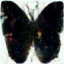

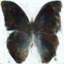

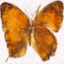

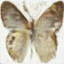

In [8]:
cct.use_DDPM_pipeline("cafierom/Butterflies-pipe")